Step 1 - Import Libararies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
from nltk.corpus import stopwords

sns.set_style('darkgrid')

Step2 - Data Loading and initial Inspection

In [ ]:
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"



Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 18 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 1.40 MiB | 4.82 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
netflix_df = pd.read_csv("/content/21-Days-21-Projects-Dataset/Datasets/netflix_titles.csv")
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Step 3 - Data Cleaning and Transformation

In [ ]:
# 1. handling missing values of director and cast by placing unkown value instead of null
netflix_df['director'] = netflix_df['director'].fillna("Unknown")
netflix_df['cast'] = netflix_df['cast'].fillna("Unknown")

netflix_df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,507
date_added,10
release_year,0
rating,7
duration,0


In [ ]:
#2. Handling missing country - we will fill with mode
country_mode = netflix_df['country'].mode()[0]
netflix_df['country'] = netflix_df['country'].fillna(country_mode)

netflix_df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,7
duration,0


In [ ]:
#3 . Dropping date_added and rating because they have less null values
netflix_df.dropna(subset = ['date_added','rating'], inplace = True)
netflix_df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
#4 converting date_added to date-time object
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'],format = 'mixed', dayfirst = False)

In [ ]:
#5 create new Features for year and month added
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month

In [ ]:
print("Missing values after cleaning")
print(netflix_df.isnull().sum())
print("\n Data types after transformation")
print(netflix_df.dtypes)

Missing values after cleaning
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

 Data types after transformation
show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added               int32
month_added              int32
dtype: object


# Step 4 - Exploratory Data Analysis & Visualization

### **Q . What is the distribution of content type ?**

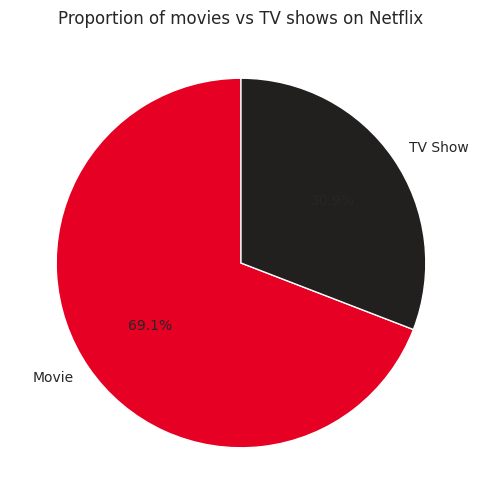

In [ ]:
plt.figure(figsize = (8,6))
type_counts = netflix_df['type'].value_counts()
plt.pie(type_counts, labels = type_counts.index, autopct = '%1.1f%%', startangle = 90 , colors = ['#e60023','#221f1f'])
plt.title('Proportion of movies vs TV shows on Netflix')
plt.ylabel('')
plt.show()



##Q. How has conetent been added over time?

<Figure size 1400x800 with 0 Axes>

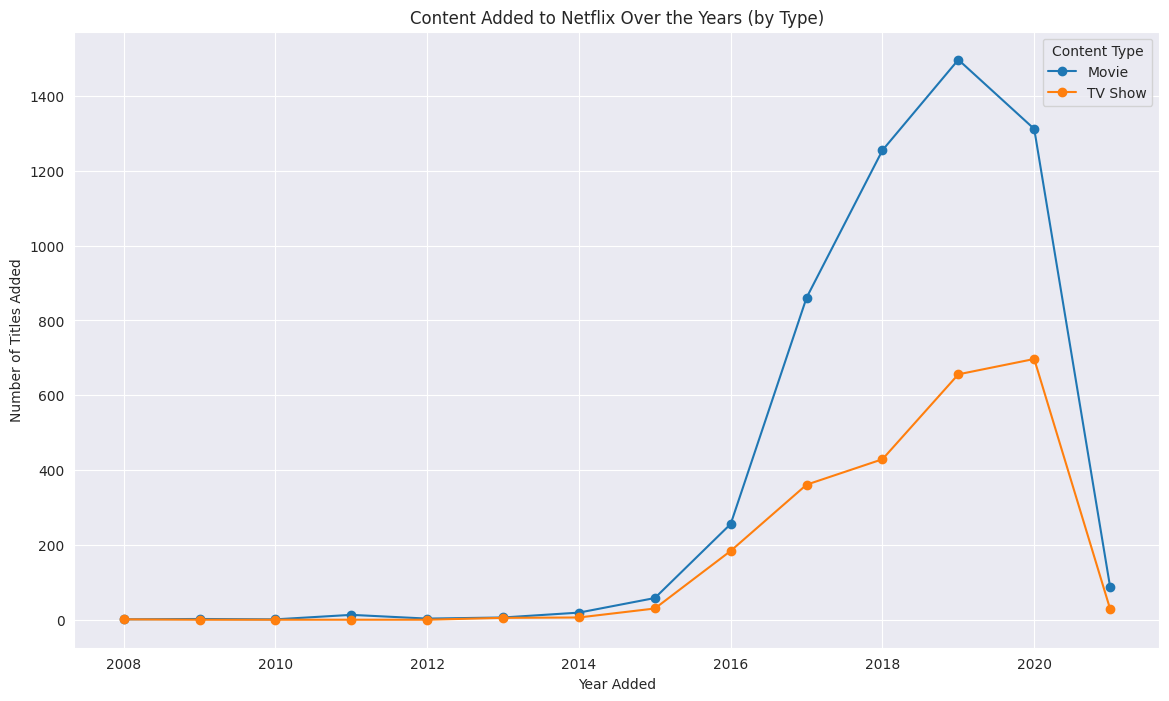

In [ ]:
# group by type and date by year

content_over_time = netflix_df.groupby(['year_added','type']).size().unstack().fillna(0)

plt.figure(figsize=(14,8))
content_over_time.plot(kind='line',marker = 'o',figsize = (14,8))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()


## Q. What are the most popular genres?

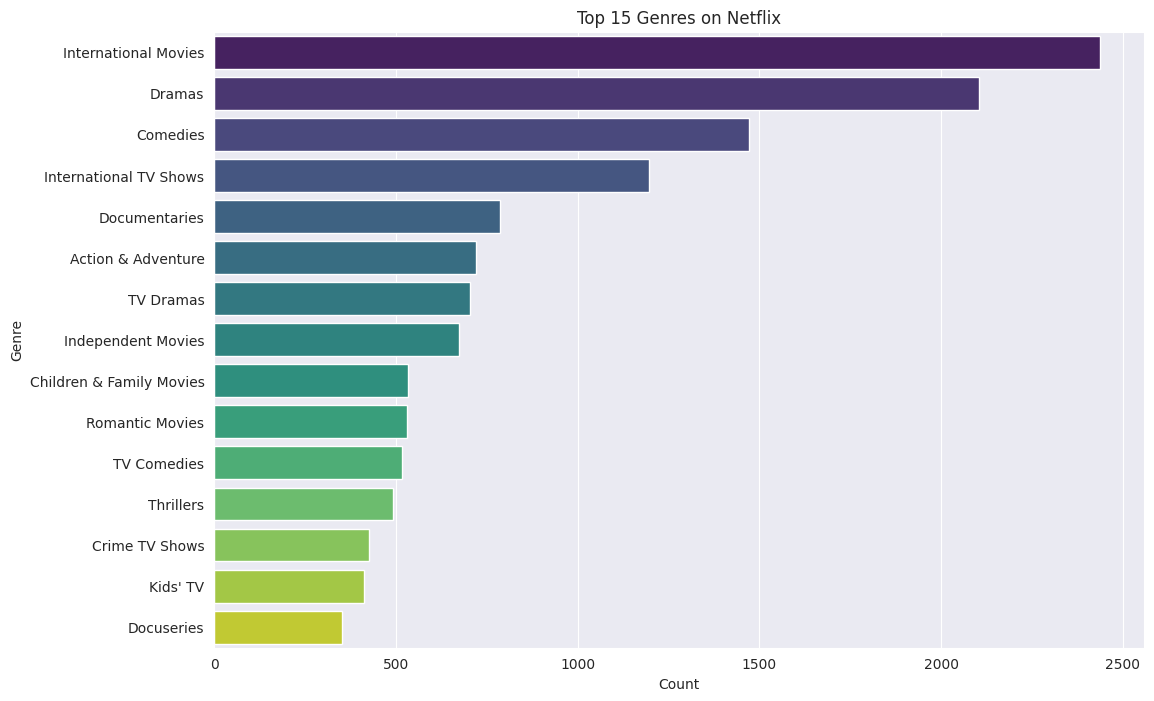

In [ ]:
# spliting the "listed_in" and explode it
genres = netflix_df.assign(genre = netflix_df['listed_in'].str.split(', ')).explode('genre')
top_genres = genres['genre'].value_counts().reset_index()
top_genres.columns = ['genre','count']
# considering only top 15
top_genres_plot = top_genres.head(15)
# plotting
plt.figure(figsize=(12,8))
sns.barplot(y='genre',x ='count',data= top_genres_plot,palette = 'viridis',hue='genre',legend=False)
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

## Q. What is the distribution of content duration

In [ ]:
# Separate movies and TV shows
movies_df = netflix_df[netflix_df['type'] == 'Movie'].copy()
tv_shows_df = netflix_df[netflix_df['type'] == 'TV Show'].copy()


In [ ]:
# Clean and convert duration for movies
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)

# Clean and convert duration for TV shows
tv_shows_df['seasons'] = tv_shows_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

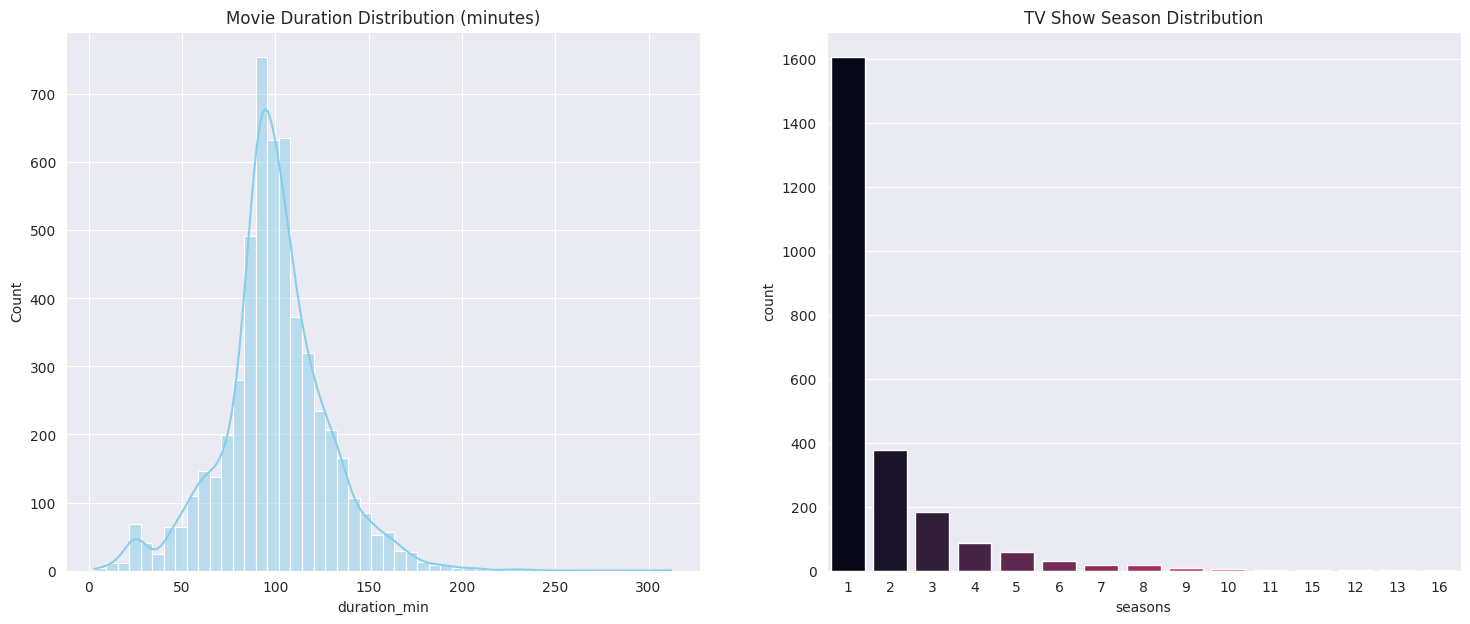

In [ ]:
# Plot the distributions
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Movie Duration Distribution
sns.histplot(ax=axes[0], data=movies_df, x='duration_min', bins=50, kde=True, color='skyblue').set_title('Movie Duration Distribution (minutes)')

# TV Show Season Distribution
sns.countplot(ax=axes[1], x='seasons', data=tv_shows_df, palette='rocket', order=tv_shows_df['seasons'].value_counts().index, hue='seasons', legend=False).set_title('TV Show Season Distribution')

plt.show()

## Q Where does the content come from ?(geographical analysis)

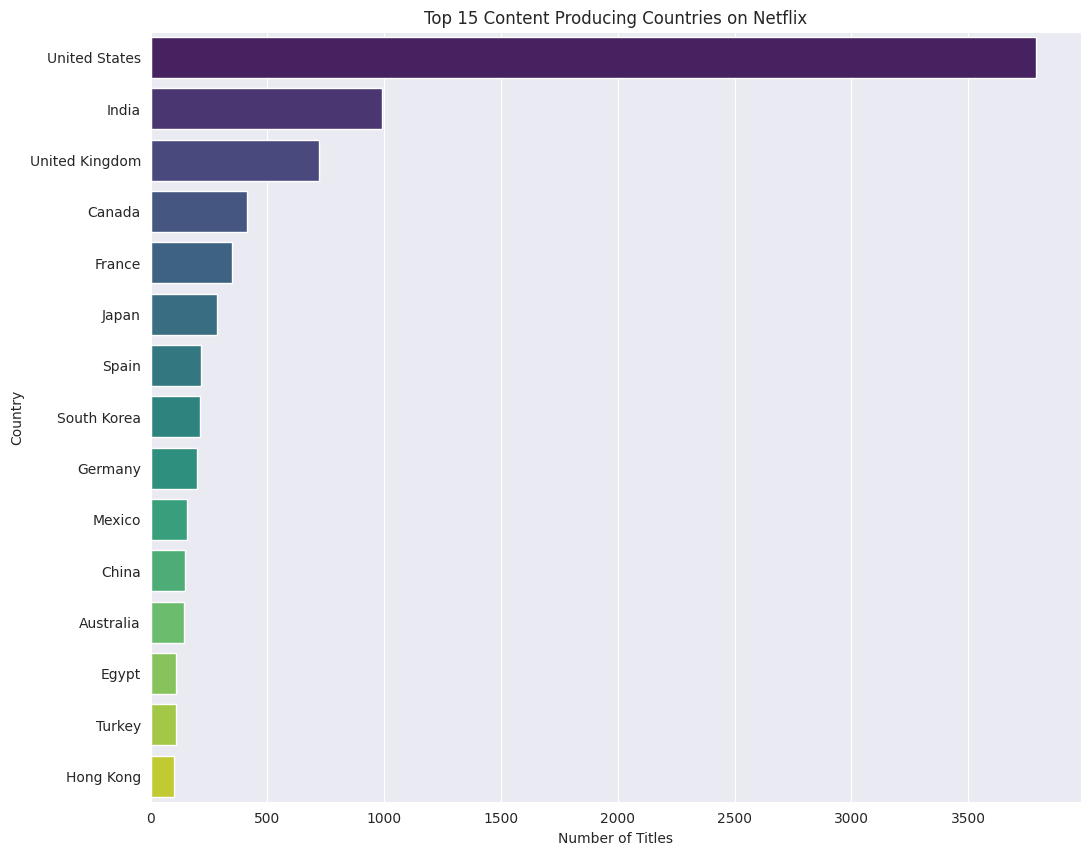

In [ ]:
# seperating countries and exploding
countries = netflix_df.assign(country = netflix_df['country'].str.split(', ')).explode('country')
top_countries = countries['country'].value_counts().reset_index()
top_countries.columns =['country','count']
# picking top 15 countries
top_countries_plot = top_countries.head(15)
# plotting
plt.figure(figsize=(12, 10))
sns.barplot(y='country', x='count', data=top_countries_plot, palette='viridis', hue='country', legend=False)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

## Q What are the maturity Ratings for content

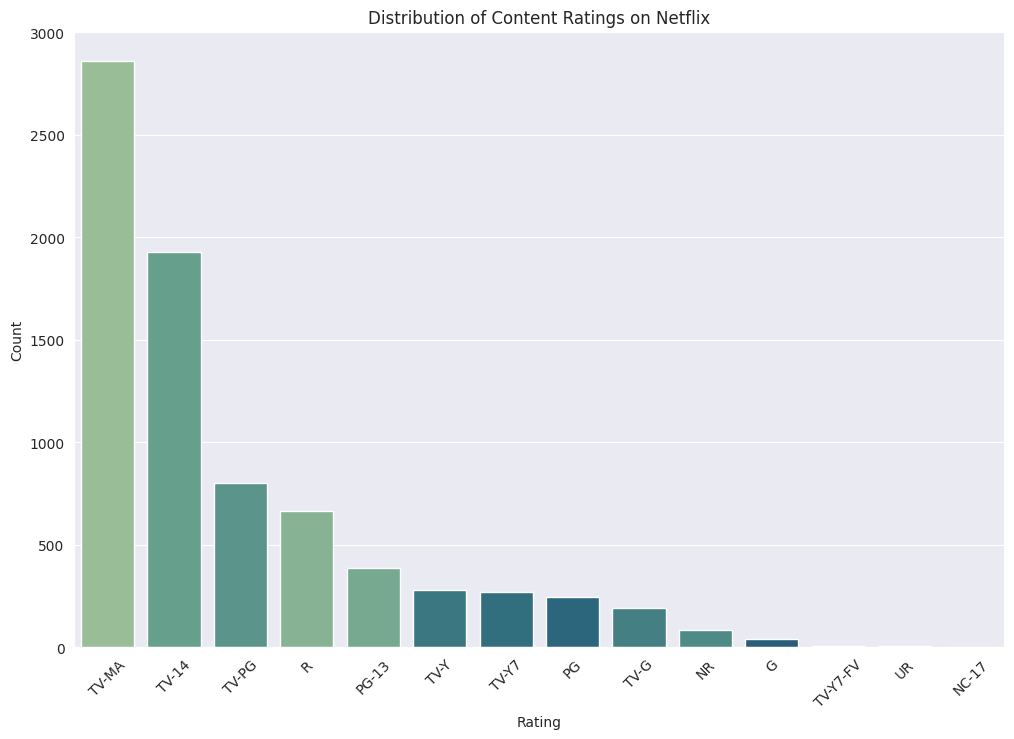

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=netflix_df, order=netflix_df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Step 5 - Feature Engineering

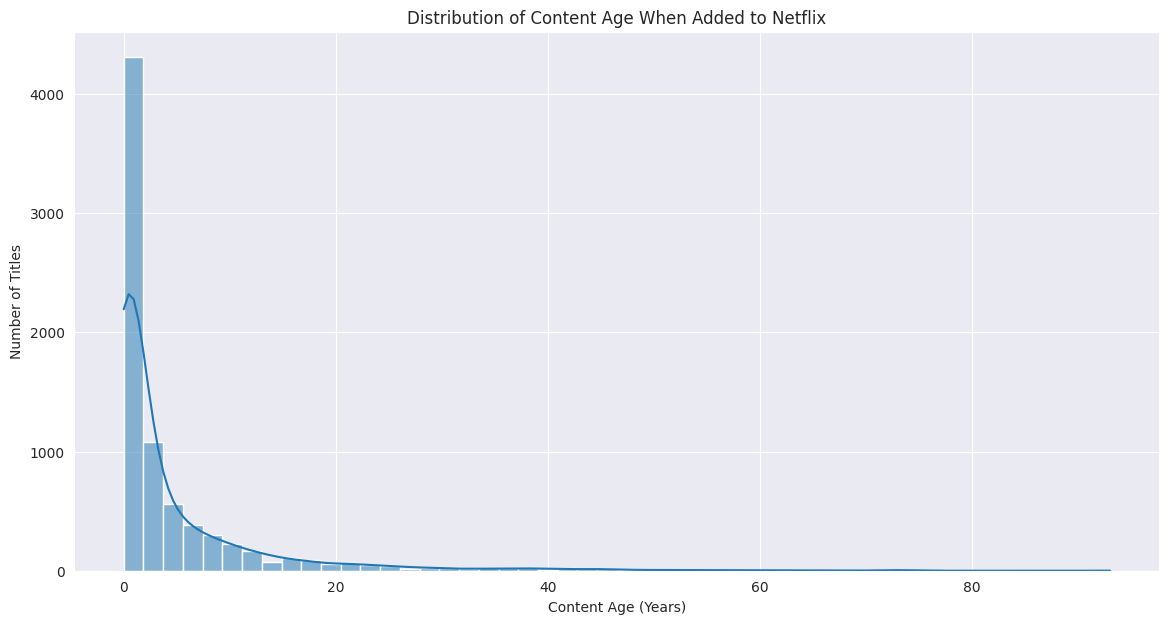

In [ ]:
# age on netflix
netflix_df['age_on_netflix'] = netflix_df['year_added'] - netflix_df['release_year']

# filter out potential error
content_age = netflix_df[netflix_df['age_on_netflix']>=0]

#plotting
plt.figure(figsize=(14, 7))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()


## Step 6 : Deeper Multivariate Analysis

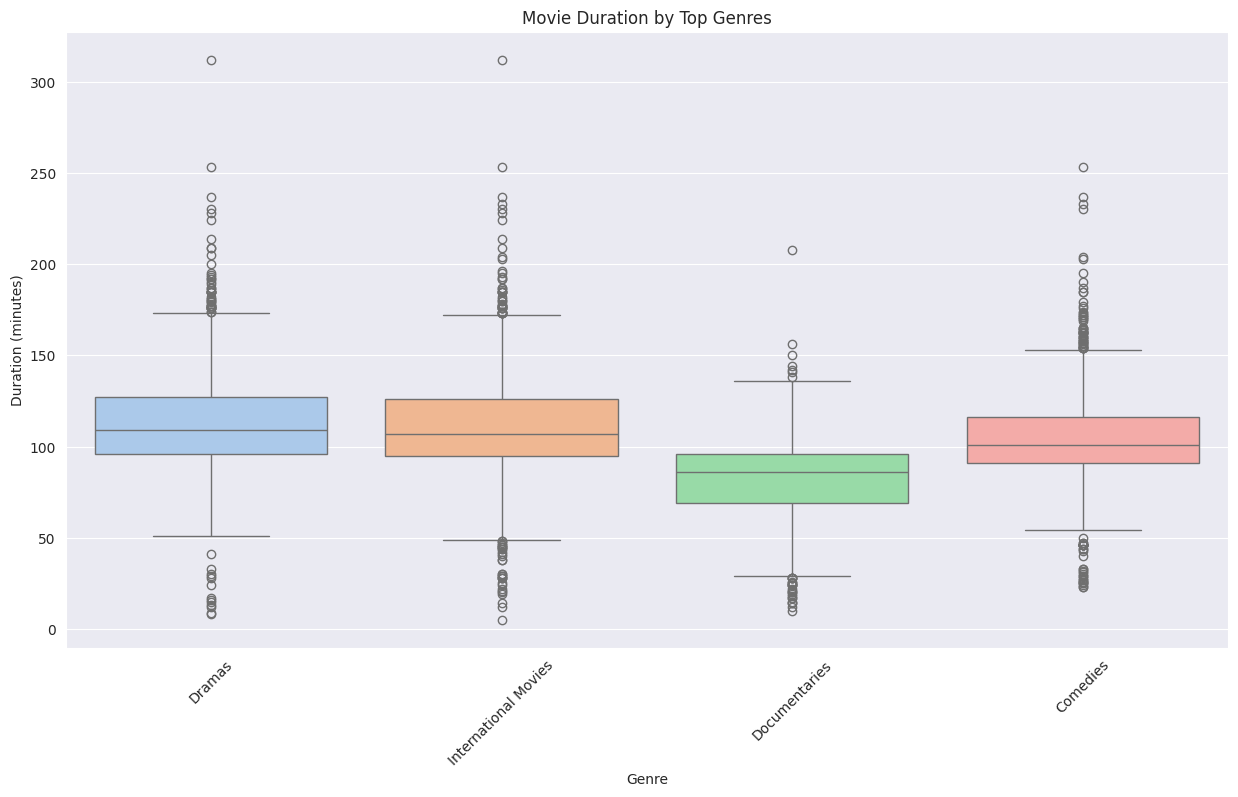

In [ ]:
top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] =='Movie') & (genres['genre'].isin(top_genres))].copy()
genres_movies['duration_min']= genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(15, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

## Step 7 Word Cloud from Content Description

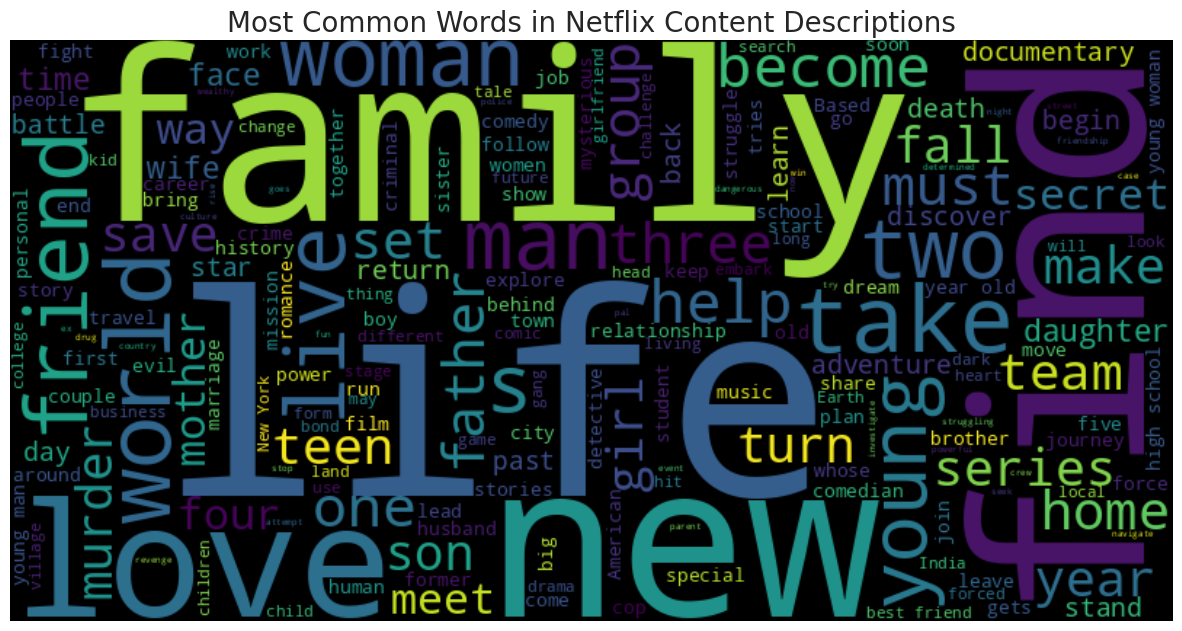

In [ ]:
text = ' '.join(netflix_df['description'])

wordcloud = WordCloud(width=  800,height=400,background_color='black').generate(text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()


# Submission Questions

### Q1 . How has the distribution of content ratings changed over time

<Figure size 1400x800 with 0 Axes>

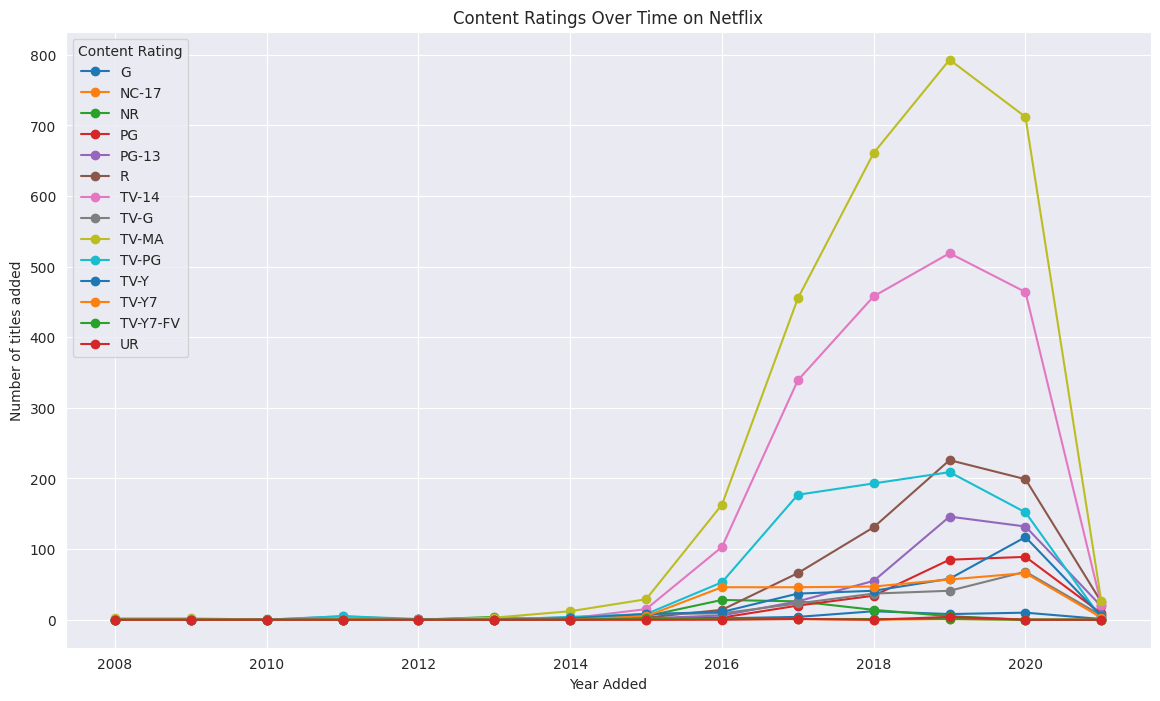

In [ ]:
# grouping rating and year_added
content_ratings_over_time = netflix_df.groupby(['year_added','rating']).size().unstack().fillna(0)

#plotting
plt.figure(figsize=(14,8))
content_ratings_over_time.plot(kind='line',marker='o',figsize=(14,8))
plt.title('Content Ratings Over Time on Netflix')
plt.xlabel('Year Added')
plt.ylabel('Number of titles added')
plt.legend(title='Content Rating')
plt.grid(True)
plt.show()

## Q2. Is there a relationship between content age and its type(Movie vs TV shows)?

Text(0, 0.5, 'Content Age (Years)')

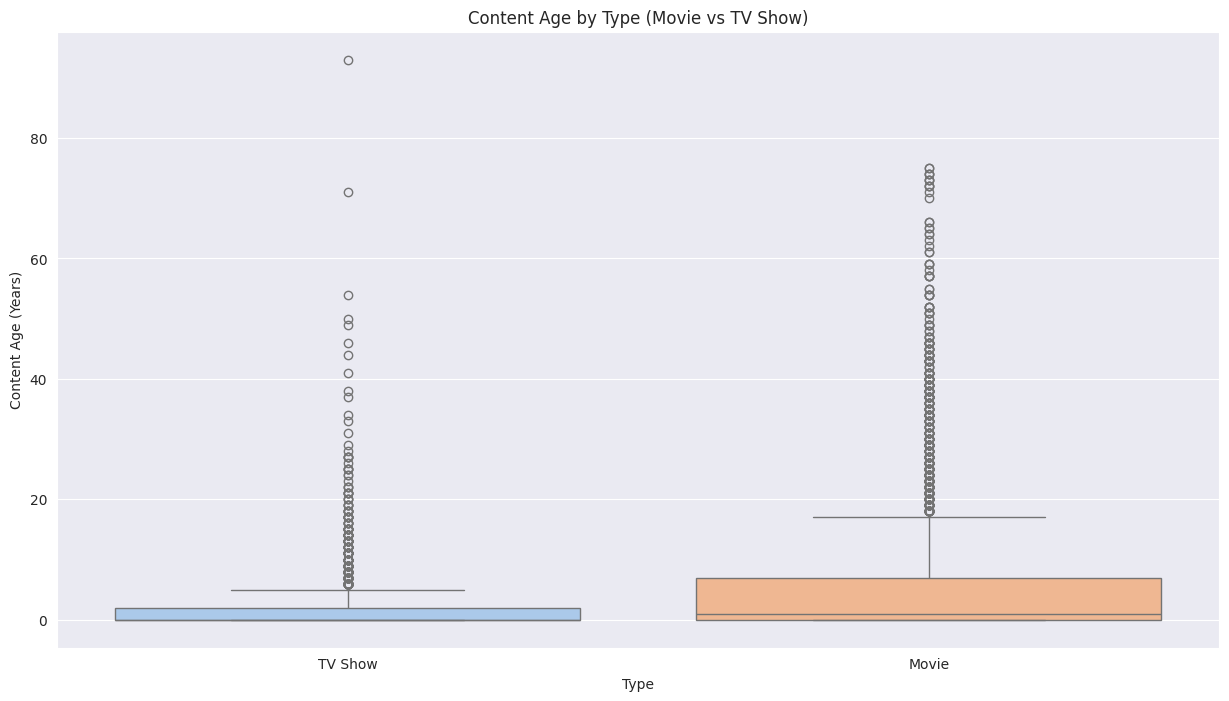

In [ ]:
#creating 'age_on_netflix'
netflix_df['age_on_netflix'] = netflix_df['year_added'] - netflix_df['release_year']
#filtering out erros
content_age = netflix_df[netflix_df['age_on_netflix'] >= 0]
#plotting
plt.figure(figsize=(15, 8))
sns.boxplot(data=content_age, x='type', y='age_on_netflix', palette='pastel', hue='type', legend=False)
plt.title('Content Age by Type (Movie vs TV Show)')
plt.xlabel('Type')
plt.ylabel('Content Age (Years)')




Insights -

1. Movies on Netflix include a mix of both old and new content, so they have a higher average age and many outliers.

2. TV Shows are relatively newer on Netflix, indicating that Netflix focuses more on acquiring/releasing newer TV shows rather than older ones.

3. There is a relationship between content type and age:

    Movies are more likely to have older content.
  
    TV shows are more recent overall. bold text **bold text**

## Q3 . Can we identify any trends in content production based on the release year vs the year added to netflix?

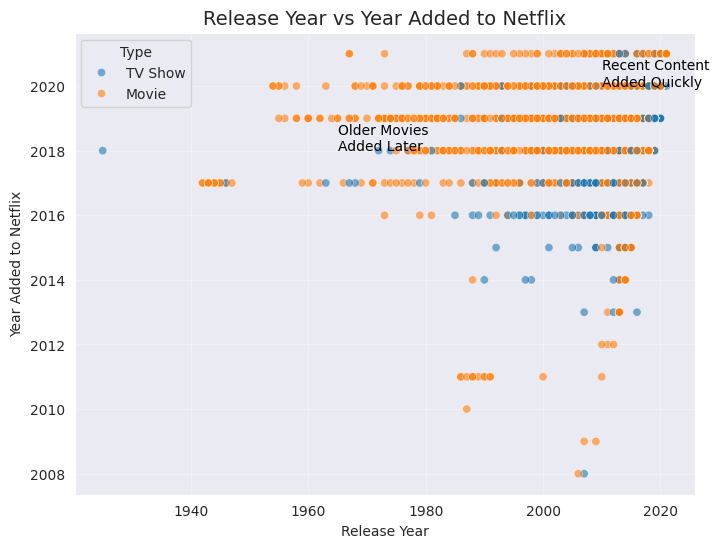

In [ ]:

plt.figure(figsize=(8,6))
sns.scatterplot(data= netflix_df, x='release_year', y='year_added', hue='type',alpha =0.6)
plt.xlabel("Release Year")
plt.ylabel("Year Added to Netflix")
plt.title("Release Year vs Year Added to Netflix", fontsize=14)
plt.legend(title="Type")
plt.grid(alpha=0.3)

plt.text(1965, 2018, "Older Movies\nAdded Later", fontsize=10, color="black")
plt.text(2010, 2020, "Recent Content\nAdded Quickly", fontsize=10, color="black")
plt.show()

Yes we can Identify trends in content production

Insights:

Netflix’s content production is trending toward more original, recently produced TV shows and movies, with a strong emphasis on new releases being added quickly. Older movies are still included but mainly for catalog depth, while TV shows dominate Netflix’s growth strategy since 2015.


##Q4. What are the most common word pairs or phareses in content descriptions?

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


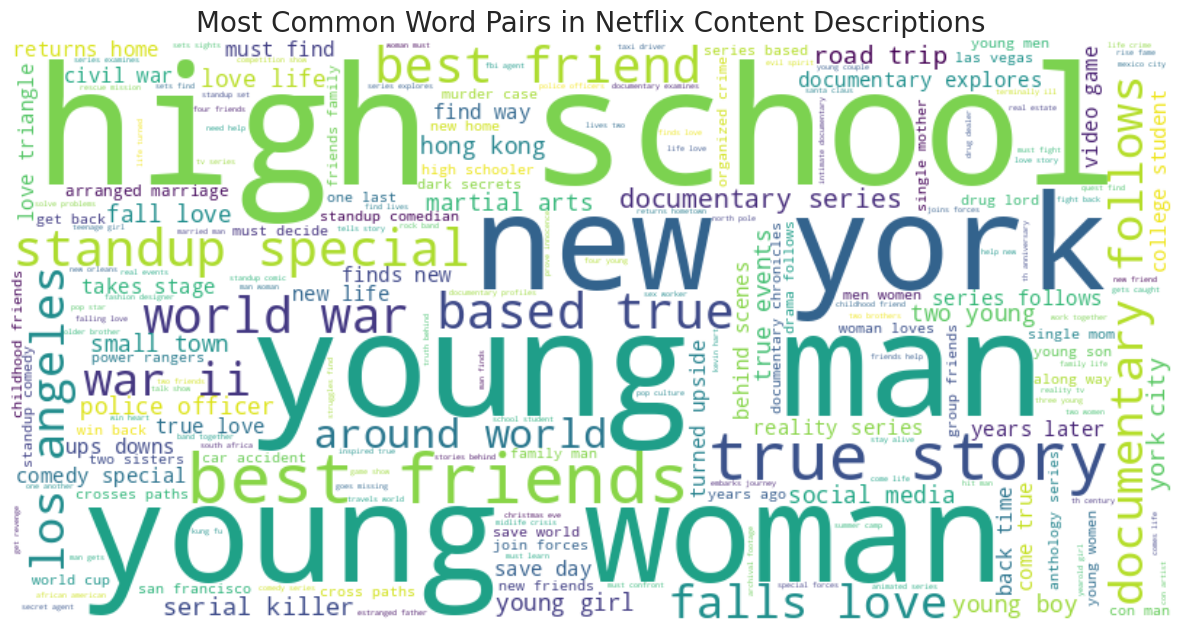

In [ ]:
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')

# Get English stopwords
stop_words = set(stopwords.words('english'))

#join
text = " ".join(netflix_df['description'])

# Clean text
text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
words = text.split()

# Remove stopwords
words = [w for w in words if w not in stop_words]

# Create word pairs
pairs = [' '.join([words[i], words[i+1]]) for i in range(len(words)-1)]

# Count frequency of pairs
pair_counts = Counter(pairs)

# Keep only frequent pairs (appearing more than 5 times)
pair_counts = {k:v for k,v in pair_counts.items() if v > 5}

# Create WordCloud from pairs
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(pair_counts)

# Plot
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Word Pairs in Netflix Content Descriptions", fontsize=20)
plt.show()


Insights:

Word pairs like "young man","high school","true story" etc appears larger meaning - they have been most common type of content on netflix

## Q5 . Who are the top directors on netflix

/tmp/ipython-input-617026120.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='director', x='count', data=top_director_plot, palette='viridis', errorbar=None)


<function matplotlib.pyplot.show(close=None, block=None)>

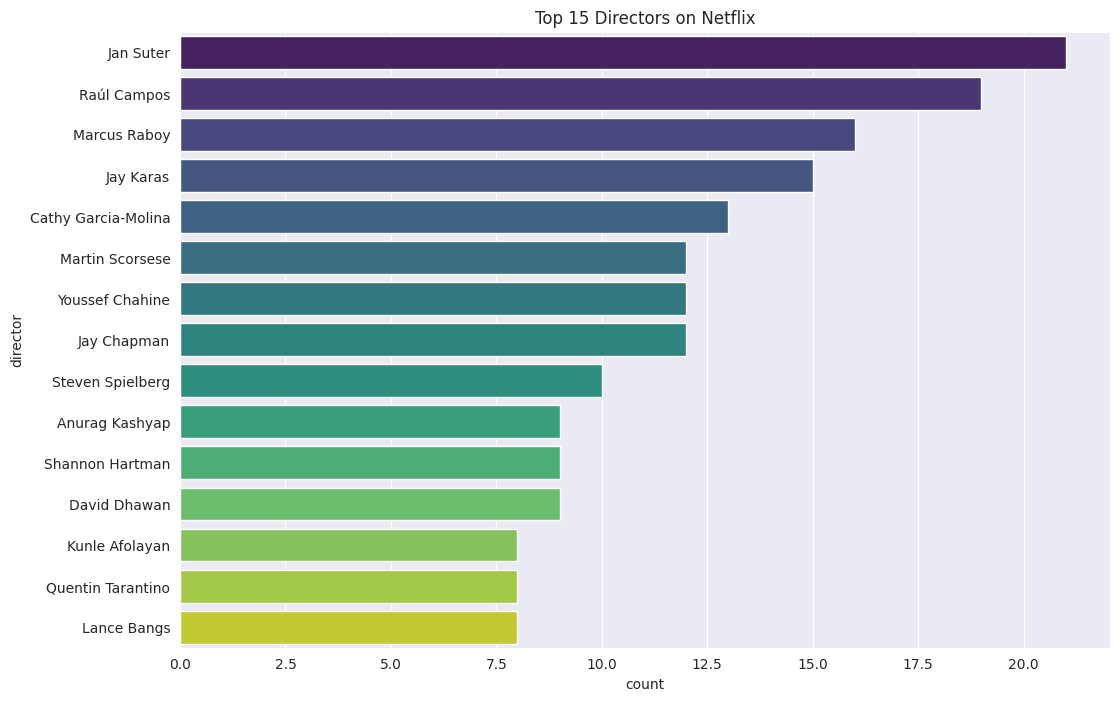

In [ ]:
netflix_df['director'].value_counts()

# sepearting multiple directors
directors = netflix_df.assign(director = netflix_df['director'].str.split(', ')).explode('director')

# ignoring unkown directors
directors = directors[directors['director']!= 'Unknown']

top_director = directors['director'].value_counts().reset_index()
top_director.columns = ['director','count']
top_director

#top 15 directors
top_director_plot = top_director.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y='director', x='count', data=top_director_plot, palette='viridis', errorbar=None)
plt.title('Top 15 Directors on Netflix')
plt.xlabel('count')
plt.ylabel('director')
plt.show



Insights -

1.Jan Suter has the highest number of works on Netflix

2.Raúl Campos and Marcus Raboy also direct a large number of titles.